# Working Directory

In [1]:
import os
os.chdir(os.pardir)

# Imports

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt

In [3]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms


In [4]:
from vae.utils import display_random_image, print_model, show_tensor
from vae.dataset import get_dataloaders
from vae.model import VAE
from vae.loss import VAELoss
from vae.engine import train_model
from vae.inference import encode_decode, encode, decode

# Config

In [5]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(DEVICE)
DEVICE

'cuda'

In [9]:
ROOT_PATH = Path("vae")
DATASET_PATH = ROOT_PATH / "data"

# Hyperparameters

In [10]:
raw_dataset = datasets.MNIST(DATASET_PATH, train=True, download=True)

In [11]:
pil_img, _ = raw_dataset[0]

In [12]:
random_img = transforms.ToTensor()(pil_img)
random_img.shape

torch.Size([1, 28, 28])

In [13]:
IMSIZE = random_img.shape[-1]
N_CHANNELS = random_img.shape[0]
N_CLASSES = len(raw_dataset.classes)
EPOCHS = 20
BATCH_SIZE = 128
LEARNING = 0.002

# Dataset

In [14]:
train_dataloader, test_dataloader = get_dataloaders(
    DATASET_PATH, 
    DEVICE, 
    BATCH_SIZE
)

Picked index is 43176
Image class is 2 - two


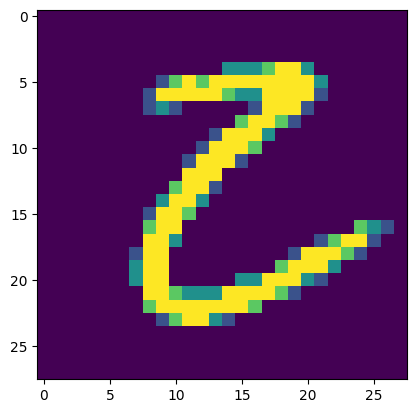

43176

In [15]:
display_random_image(train_dataloader.dataset)

# My model

In [16]:
image_shape = (1, 28,28)
latent_space_dim = 16
conv_layers = [(1, 128), (128, 64)]
perceptron_layers = [(64, 32), (32, 16)]

In [17]:
my_model = VAE(image_shape, latent_space_dim, conv_layers, perceptron_layers)

In [18]:
print_model(my_model)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Trainable
VAE                                      [128, 1, 28, 28]          [128, 1, 28, 28]          --                        True
├─VAEEncoder: 1-1                        [128, 1, 28, 28]          [128, 32]                 --                        True
│    └─Conv2d: 2-1                       [128, 1, 28, 28]          [128, 128, 28, 28]        1,280                     True
│    └─BatchNorm2d: 2-2                  [128, 128, 28, 28]        [128, 128, 28, 28]        256                       True
│    └─MaxPool2d: 2-3                    [128, 128, 28, 28]        [128, 128, 14, 14]        --                        --
│    └─Conv2d: 2-4                       [128, 128, 14, 14]        [128, 64, 14, 14]         73,792                    True
│    └─BatchNorm2d: 2-5                  [128, 64, 14, 14]         [128, 64, 14, 14]         128                       True
│    

# Training

In [19]:
optimizer = optim.Adam(my_model.parameters(), lr=LEARNING)

In [20]:
loss_fn = VAELoss()

In [ ]:
train_model(
    my_model, 
    train_dataloader, 
    test_dataloader, 
    loss_fn, 
    optimizer, 
    EPOCHS
)

In [21]:
MODEL_PATH = ROOT_PATH / "vae.pth"

In [ ]:
torch.save(my_model.state_dict(), MODEL_PATH)

# Generating images

In [22]:
loaded = VAE(image_shape, latent_space_dim, conv_layers, perceptron_layers)
loaded.load_state_dict(torch.load(MODEL_PATH))

<All keys matched successfully>

Picked index is 9565
Image class is 4 - four


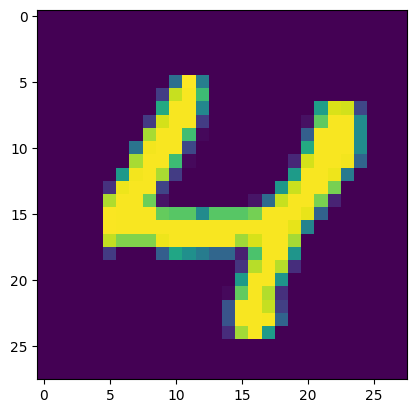

In [43]:
random_index = display_random_image(test_dataloader.dataset)
input_ = test_dataloader.dataset[random_index][0]

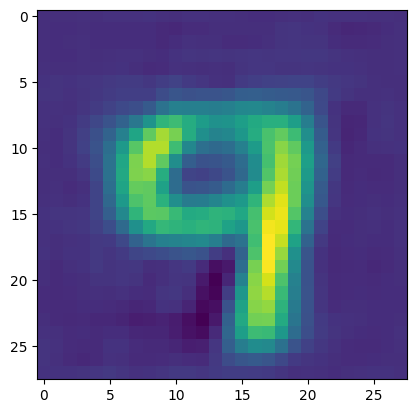

In [44]:
output = encode_decode(loaded, input_)
show_tensor(output)

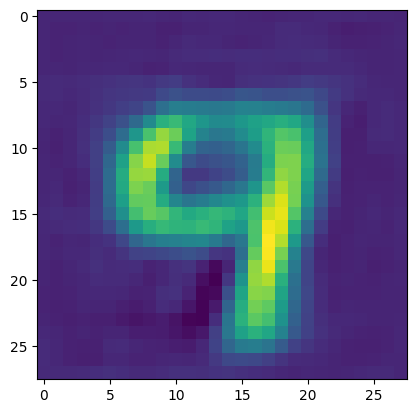

In [51]:
mean, logvar = encode(loaded, input_)
example = decode(loaded, mean, logvar)
show_tensor(example)